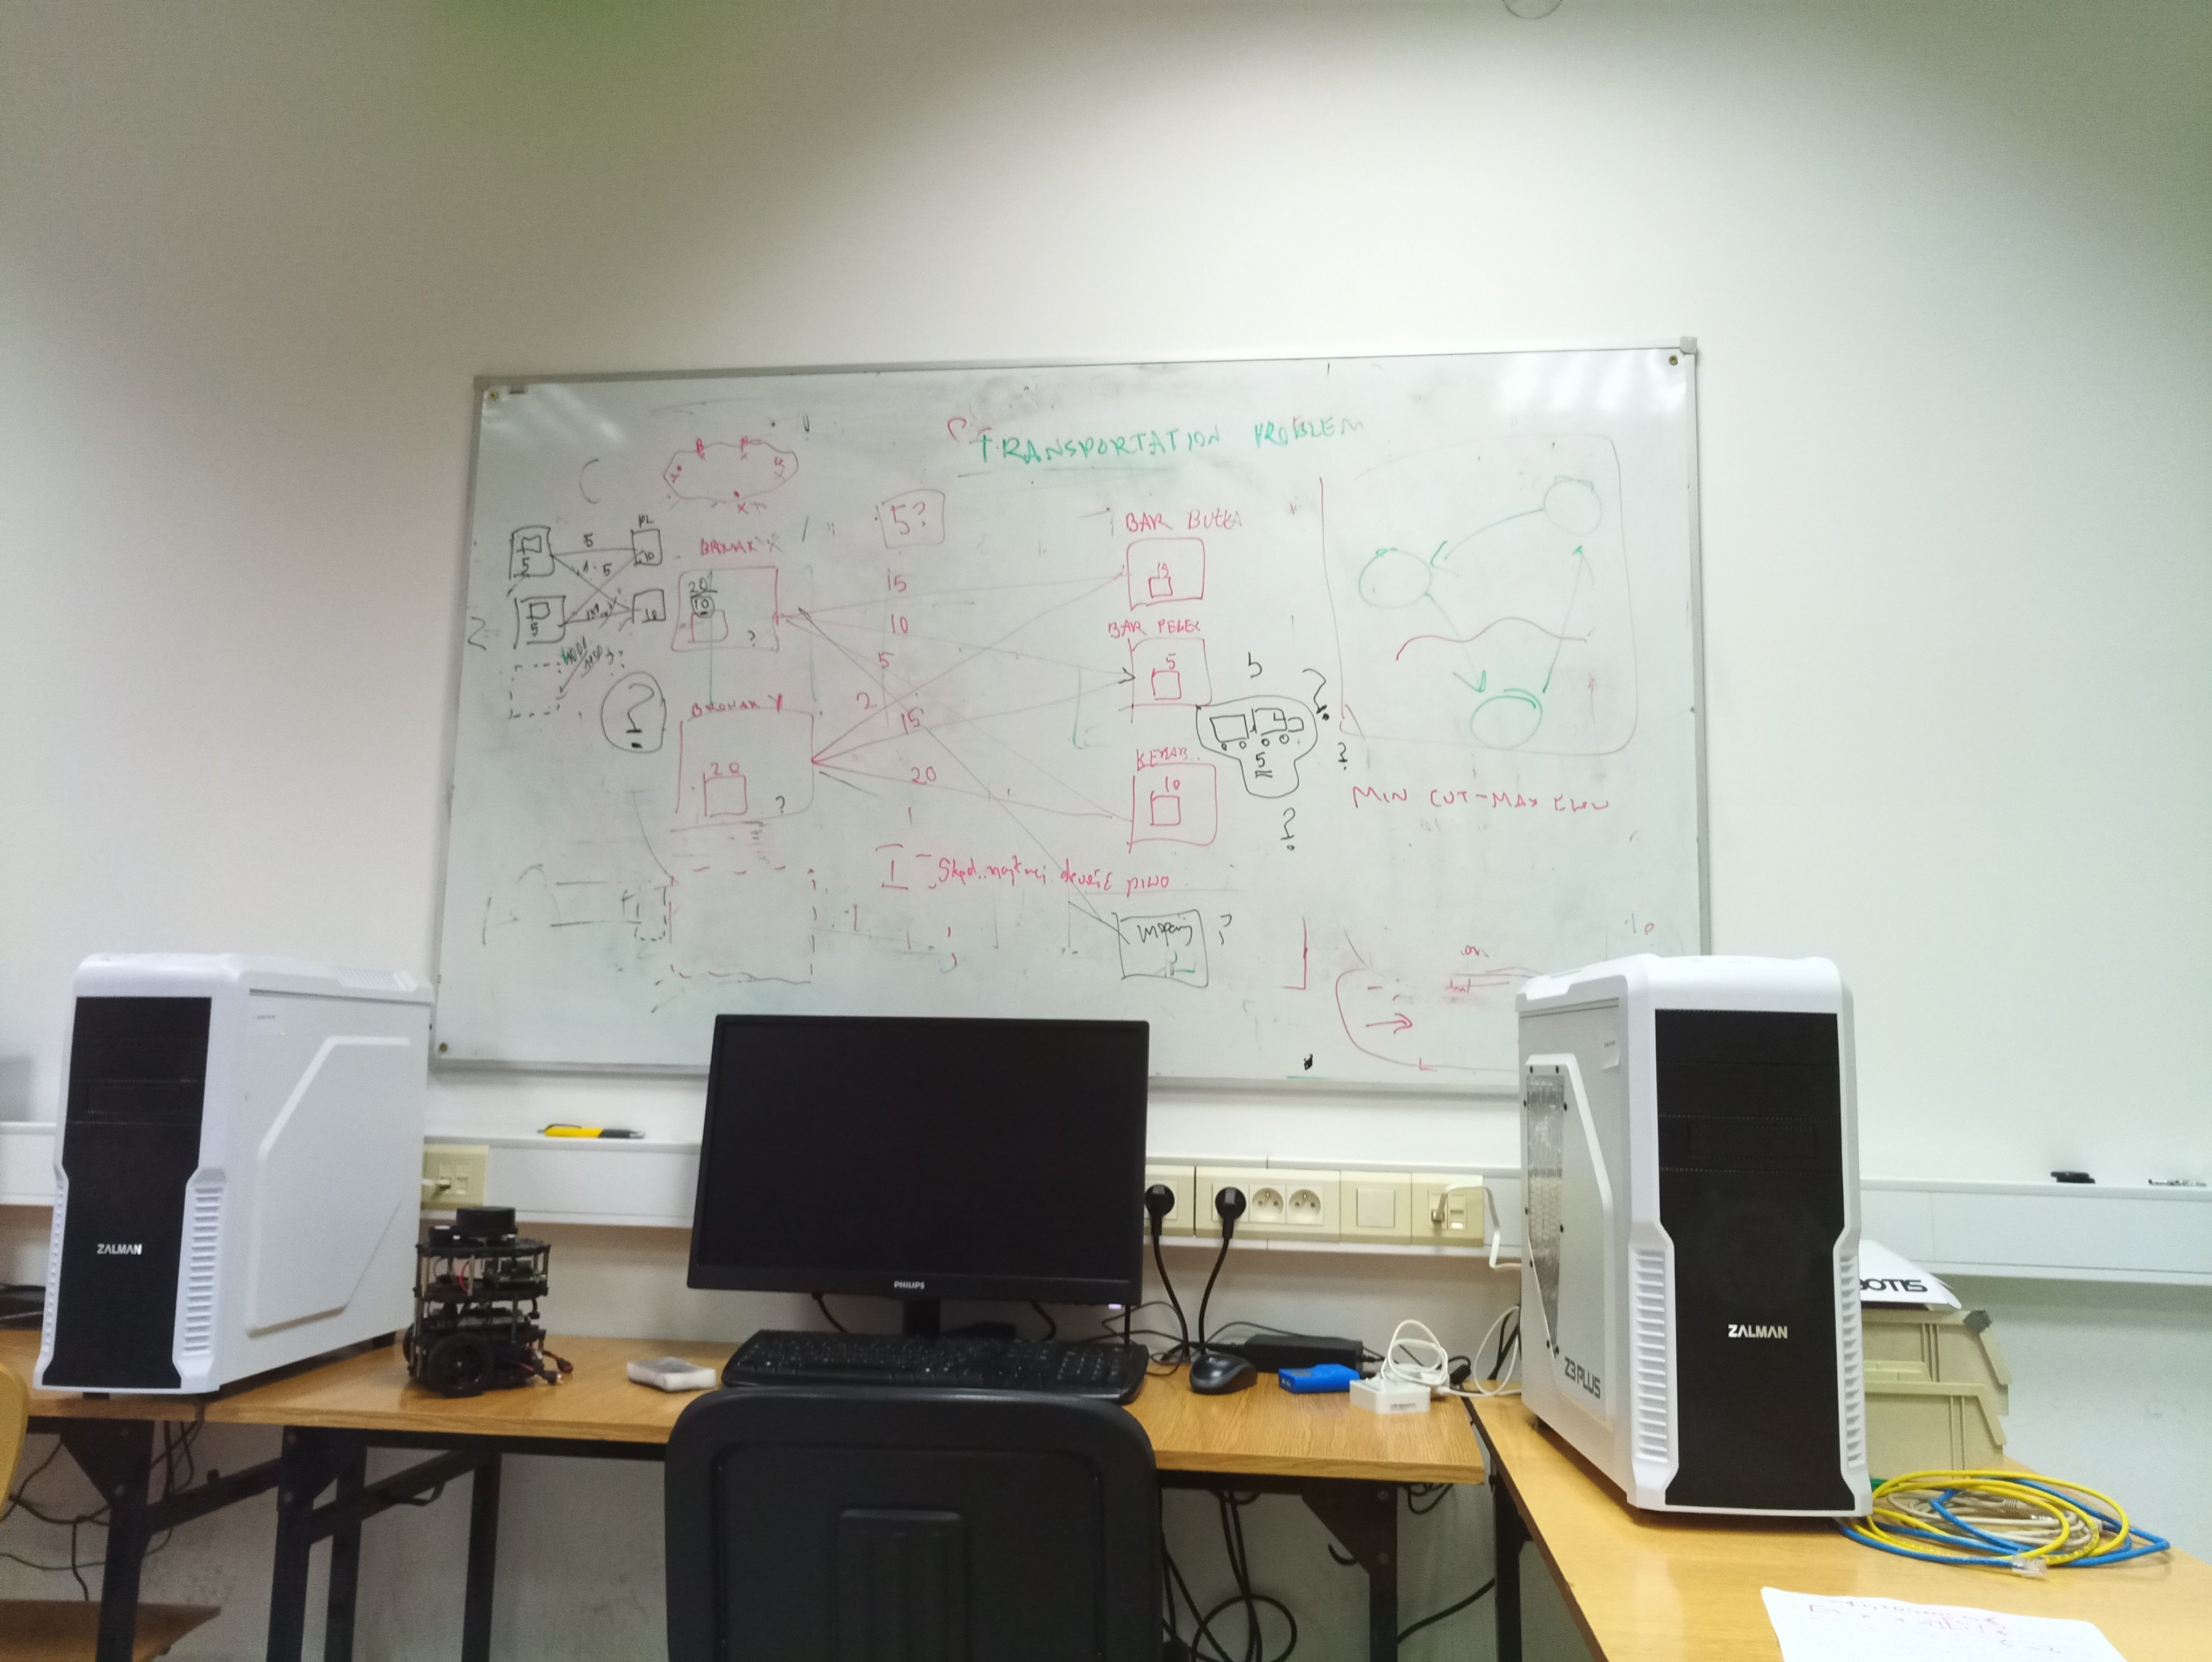

## Zadanie polegało na znalezieniu optymalnego (najtańszego) zaopatrzenia 3 barów z 2 browarów
### Zadanie wykonaliśmy korzystając z minimalizacji funkcji celu
### Koszty transportu ustaliliśmy zgodnie z danymi z tablicy, dodatkowo dodaliśmy koszt 1000 za każdą niedostarczoną do sklepu butelkę piwa

In [1]:
import pulp
import pandas as pd

problem_transport = pulp.LpProblem("Problem transport", pulp.LpMinimize)

TXB = pulp.LpVariable('X-Bułka', lowBound=0, upBound=19, cat='Integer')
TXP = pulp.LpVariable('X-Pelex', lowBound=0, upBound=5, cat='Integer')
TXK = pulp.LpVariable('X-Kebab', lowBound=0, upBound=10, cat='Integer')
TYB = pulp.LpVariable('Y-Bułka', lowBound=0, upBound=19, cat='Integer')
TYP = pulp.LpVariable('Y-Pelex', lowBound=0, upBound=5, cat='Integer')
TYK = pulp.LpVariable('Y-Kebab', lowBound=0, upBound=10, cat='Integer')

problem_transport += TXB + TYB <=19, 'Bułka zapotrzebowanie'
problem_transport += TXP + TYP <=5, 'Pelex zapotrzebowanie'
problem_transport += TXK + TYK <=10, 'Kebab zapotrzebowanie'
problem_transport += TXB + TXP + TXK <=20, 'X możliwości'
problem_transport += TYB + TYP + TYK <=20, 'Y możliwości'
problem_transport += ((TXB * 15) + (TXP * 10) + (TXK * 5) + (TYB * 2) + (TYP * 15) + (TYK *20)) + 1000 * ((19 - TXB - TYB) + (5 - TXP - TYP) + (10 - TXK - TYK))

In [2]:
problem_transport

Problem transport:
MINIMIZE
-985*X_Bułka + -995*X_Kebab + -990*X_Pelex + -998*Y_Bułka + -980*Y_Kebab + -985*Y_Pelex + 34000
SUBJECT TO
Bułka_zapotrzebowanie: X_Bułka + Y_Bułka <= 19

Pelex_zapotrzebowanie: X_Pelex + Y_Pelex <= 5

Kebab_zapotrzebowanie: X_Kebab + Y_Kebab <= 10

X_możliwości: X_Bułka + X_Kebab + X_Pelex <= 20

Y_możliwości: Y_Bułka + Y_Kebab + Y_Pelex <= 20

VARIABLES
0 <= X_Bułka <= 19 Integer
0 <= X_Kebab <= 10 Integer
0 <= X_Pelex <= 5 Integer
0 <= Y_Bułka <= 19 Integer
0 <= Y_Kebab <= 10 Integer
0 <= Y_Pelex <= 5 Integer

## Najtańszym rozwiązaniem jest zaopatrzenie Kebabu i Pelexu z browaru X, a baru Bułka z browaru Y

In [3]:
problem_transport.solve()
print("Status:", pulp.LpStatus[problem_transport.status])
for variable in problem_transport.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print("Transport {} ".format(pulp.value(problem_transport.objective)))

Status: Optimal
X_Bułka = 0.0
X_Kebab = 10.0
X_Pelex = 5.0
Y_Bułka = 19.0
Y_Kebab = 0.0
Y_Pelex = 0.0
Transport 138.0 
